# Illustration du Théorème Central Limite
Soit $(X_n)_{n \ge 1}$ une suite de variables aléatoires _i.i.d._ de carré intégrable. On définit les suites $(m_n)_{n \ge 1}$ et $(\sigma_n^2)_{n \ge 2}$ (non définie pour $n = 1$) de la façon suivante
$$
    m_n = \frac{1}{n} \sum_{k=1}^n X_k \qquad \text{et} \qquad 
    \sigma_n^2 = \frac{1}{n-1} \sum_{k=1}^n (X_k - m_n)^2 \quad \text{pour} \; n \ge 2
$$
et on veut illustrer la Loi Forte des Grands Nombres et le Théorème Central Limite (étendu en utilisant le lemme de Slutsky pour remplacer $\sigma^2 = \mathrm{var}(X_1)$ par l'estimateur $\sigma_n^2$) c'est à dire les convergences
$$
    m_n \xrightarrow{p.s.} m \qquad \text{et} \qquad 
    \sqrt{n} \Bigl(\frac{m_n - m}{\sigma_n}\Bigr) \xrightarrow{\mathcal{L}} \mathcal{N}(0, 1).
$$
Plus précisément on constuit l'intervalle de confiance (asymptotique) à 95% à partir du TCL c'est à dire 
$$
    \text{pour $n$ grand} \quad \mathbf{P} \biggl( m \in \biggl[ m_n - \frac{1.96 \sigma_n}{\sqrt{n}} , m_n + \frac{1.96 \sigma_n}{\sqrt{n}} \biggr] \biggr) \simeq 0.95
$$

### Loi uniforme
Reproduire le tracé suivant où les points sont les réalisations $X_k$ (en fonction de $k$ avec les options `pch = 3, cex=.5, col="grey"`) de loi uniforme sur $[-4,8]$. La ligne bleue correspond à la moyenne $m$, la courbe rouge correspond à la suite $m_n$ et les lignes noires correspondent aux bornes de l'intervalle de confiance. 
![image](TCL_unif.png)

[1]         NA  0.7771202 16.1616743 11.3243928 17.5531251 14.1777274

[1]         NA  0.7771202 16.1616743 11.3243928 17.5531251 14.1777274

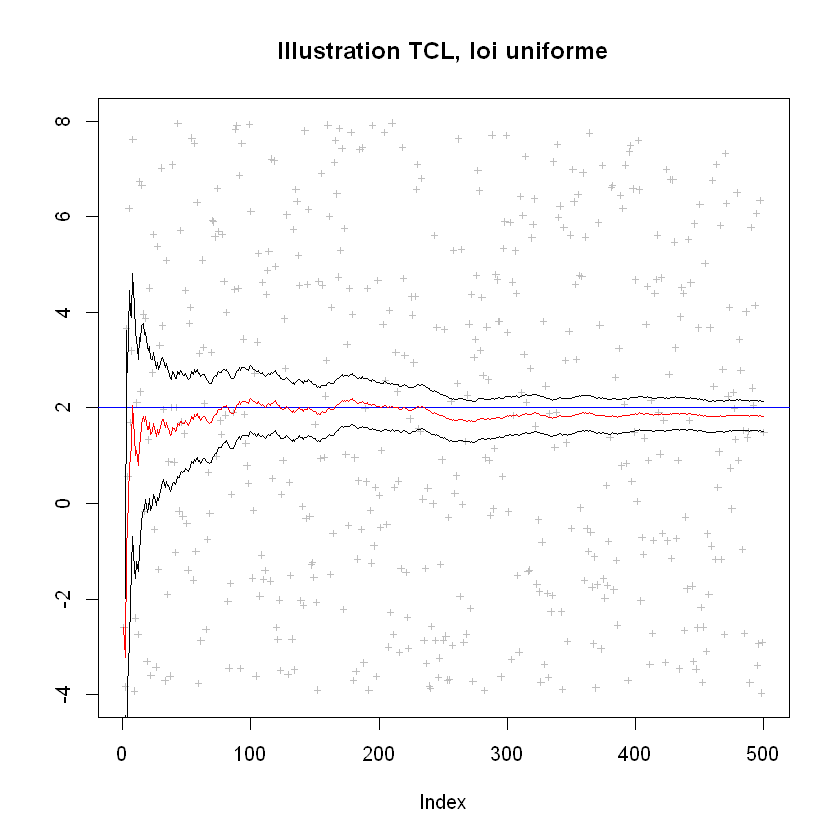

In [1]:
nsim <- 500
x <- runif(nsim, min = -4, max = 8)
plot(x, ylim = c(-4,8), ylab = NA, pch = 3, cex=.5, col="grey", main = "Illustration TCL, loi uniforme")

abline(h = 2, col = "blue")                     # la ligne bleue 
m <- cumsum(x) / seq_along(x)                   # le vecteur m contient les moyennes cumulées 
                                                # on peut aussi diviser par (1:numsim)
lines(m, col = "red")                           

v <- sapply(2:nsim, function(k)               # on calcule la variance pour $n> 2$
            sum((x[1:k] - m[k])^2) / (k-1)) 
v <- c(NA, v)            # NA pour n = 1
head(v)
# autre approche équivalente
v <- sapply(1:nsim, function(k) var(x[1:k]))  # on calcule directement la variance avec la fonction var
head(v)
e <- 1.96 * sqrt(v) / sqrt(1:nsim)            # taille de l'IC à 95%
lines(m+e)
lines(m-e)

### Loi de Cauchy
Reprendre rapidement l'exemple précédent en remplaçant la loi uniforme par la loi de Cauchy. On obtient des réalisations de la loi de Cauchy en utilisant la fonction `rcauchy`. Voici un exemple de ce qu'on peut obtenir. Qu'en pensez-vous ?
![image](TCL_Cauchy.png)

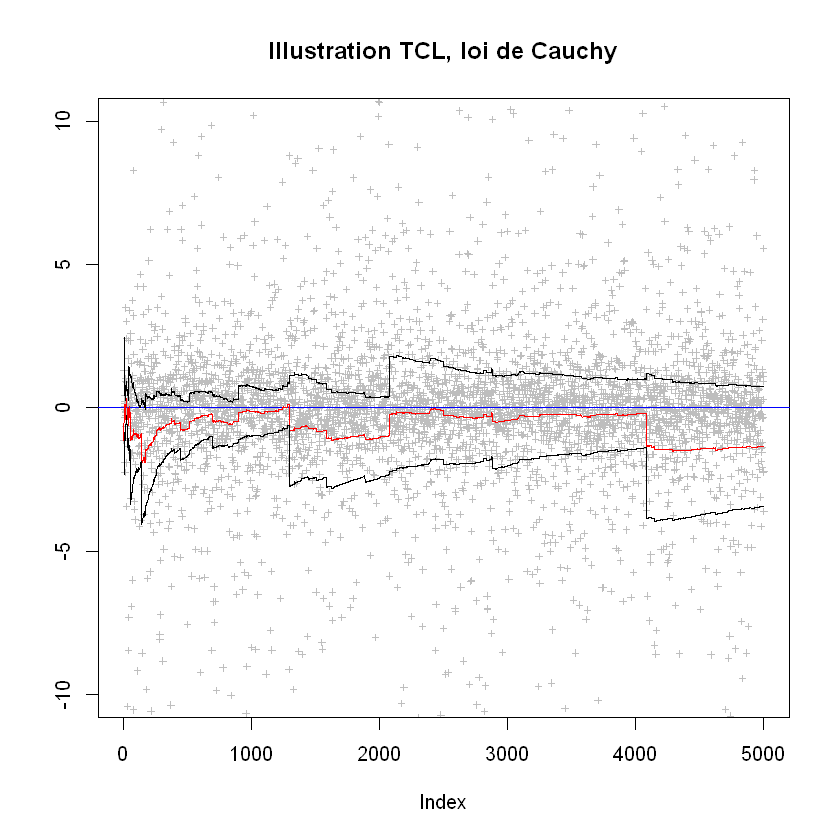

In [2]:
numsim <- 5000
x <- rcauchy(numsim)
plot(x, ylim = c(-10,10), ylab = NA, pch = 3, cex=.5, col="grey", main = "Illustration TCL, loi de Cauchy")

abline(h = 0, col = "blue")                    
m <- cumsum(x) / seq_along(x)                  
lines(m, col = "red")                          
v <- sapply(1:numsim, function(k) var(x[1:k]))   
e <- 1.96 * sqrt(v) / sqrt(1:numsim)          
lines(m+e)
lines(m-e)

# Méthode de Monte Carlo
## Préliminaire
On va mettre en oeuvre un estimateur de Monte Carlo pour calculer 
$$
    I(\beta) = \mathbf{E}[\exp(\beta G)] \quad \text{où $G \sim \mathcal{N}(0,1)$ et $\beta \in \mathbf{R}$}. 
$$
La valeur exacte $I(\beta) = \exp(\beta^2/2)$ est connue mais cet exemple permet d'illustrer l'importance des bornes de l'intervalle de confiance (et donc de l'estimation de la variance) dans une méthode de Monte Carlo. La seule valeur moyenne $I_n = \frac{1}{n} \sum_{k=1}^n X_k$ n'est pas suffisante pour déterminer $I$. 

Reproduire le tableau suivant (une matrice) où chaque colonne représente un résultat pour une valeur de $\beta \in \{0.2, 0.5, 1, 2, 3, 5\}$: la première ligne représente la valeur moyenne $I_n$, les lignes 2 et 3 sont les bornes inférieures et supérieurs de l'IC à 95% et la quatrième ligne est l'estimateur de la variance. Ce tableau est obtenu pour $n = 1\,000\,000$. Comment interpréter ce tableau ?

<table border=1>
<tr> <th>  </th> <th> 0.2 </th> <th> 0.5 </th> <th> 1 </th> <th> 2 </th> <th> 3 </th> <th> 5 </th>  </tr>
  <tr> <td align="right"> Mean </td> <td align="right"> 1.0204 </td> <td align="right"> 1.1332 </td> <td align="right"> 1.6467 </td> <td align="right"> 7.4375 </td> <td align="right"> 93.019 </td> <td align="right"> 1.0161e+05 </td> </tr>
  <tr> <td align="right"> Lower </td> <td align="right">   1.02 </td> <td align="right">  1.132 </td> <td align="right"> 1.6425 </td> <td align="right"> 7.3392 </td> <td align="right"> 83.707 </td> <td align="right">  65532 </td> </tr>
  <tr> <td align="right"> Upper </td> <td align="right"> 1.0208 </td> <td align="right"> 1.1344 </td> <td align="right"> 1.6509 </td> <td align="right"> 7.5359 </td> <td align="right"> 102.33 </td> <td align="right"> 1.3768e+05 </td> </tr>
  <tr> <td align="right"> Var </td> <td align="right"> 0.042568 </td> <td align="right"> 0.36382 </td> <td align="right"> 4.6021 </td> <td align="right">   2518 </td> <td align="right"> 2.2574e+07 </td> <td align="right"> 3.3875e+14 </td> </tr>
   </table>



In [3]:
n <- 1e6
monte_carlo <- function(beta) {
    x <- rnorm(n)
    y <- exp(beta * x)
    m <- mean(y)
    v <- var(y)
    e <- 1.96*sqrt(var(y)/length(y))
    return(c(m, m-e, m+e, v))
}

beta <- c(0.2, 0.5, 1, 2, 3, 5)
r <- sapply(beta, monte_carlo)
colnames(r) <- beta
rownames(r) <- c("Mean", "Lower", "Upper", "Var")
                           
rbind(r)     

,0.2,0.5,1,2,3,5
Mean,1.02009436,1.1331340,1.644400,7.421081,9.493217e+01,8.696913e+04
Lower,1.01969066,1.1319519,1.640193,7.317988,8.170711e+01,6.480601e+04
Upper,1.02049807,1.1343161,1.648607,7.524175,1.081572e+02,1.091322e+05
Var,0.04242499,0.3637543,4.606643,2766.634524,4.552845e+07,1.278644e+14


# Option panier
On considère $d \ge 2$ actifs financiers dont la loi à l'instant $T > 0$ est modélisée par une loi log-normale c'est à dire 
$$
    \forall i \in \{1,\dots,d\}, \quad
    S^i_T = S^i_0 \exp\Bigl( \bigl(r-\frac{\sigma_i^2}{2}\bigr) T + \sigma_i \sqrt{T} \tilde G_i \Bigr)
$$
où le vecteur $(\tilde G_1,\dots, \tilde G_d)$ est gaussien centré de matrice de covariance $\Sigma$ et les constantes $r > 0$, $\sigma_i > 0$ sont fixées. Il s'agit d'actifs financiers $(S^i_t)_{t \in [0,T]}$, $1 \le i \le d$, modélisés par un processus de Black-Scholes multidimensionnel. On introduit la matrice $L$ triangulaire inférieure obtenue par la décomposition de Cholesky de la matrice $\Sigma = L^t L$. A l'aide de cette matrice $L$, on définit la fonction $\Phi:\mathbf{R}^d \to \mathbf{R}^d$ telle que 
$$
    (S^1_T, \dots, S^d_T) = \Phi(G_1, \dots, G_d) \quad \text{ou encore} \quad S^i_T = \Phi_i(G_1, \dots, G_d)
$$
où $(G_1, \dots, G_d) \sim \mathcal{N}(0, I_d)$ (l'égalité précédente est à considérer en loi).

Définisser les paramètres globaux $d = 10$, $T = 1$, $r = 0.04$, $S^i_0 = 100$ (pour tous les actifs), $\sigma_i = i / (2d)$ (certains actifs sont plus volatiles que d'autres) et la matrice de corrélation $\Sigma$ définie par $\Sigma_{i,i} = 1$ et $\Sigma_{i,j} = \rho \in [0,1]$ pour $i \neq j$, avec $\rho = 0.2$. 

Initialiser la matrice $L$ en utilisant la fonction `chol`. Attention la fonction `chol` renvoie une matrice triangulaire supérieure, on doit donc prendre la transposée de cette matrice pour la matrice $L$. La transposée est obtenue en utilisant la fonction `t`.

In [4]:
d <- 10
T <- 1
r <- 0.04
S_0 <- rep(100, d)
sigma <- 1:d/(2*d)
rho <- 0.5
Sigma <- matrix(0.2, 10, 10) + diag(1-0.2, 10, 10)
L <- t(chol(Sigma))

On s'intéresse au prix d'une option européenne (aussi appelé produit dérivé européen) sur le panier de ces $d$ actifs financiers, c'est à dire qu'on veut calculer 
$$
    \mathbf{E} \biggl[ \biggl(\frac{1}{d} \sum_{i=1}^d S^i_T  - K\biggr)_+ \biggr]. %\quad \text{avec} \quad g(x) = (x-K)_+ \quad \text{ou} \quad g(x) = (K-x)_+.
$$
Définir une fonction $\phi: \mathbf{R}^d \times \mathbf{R}_+ \to \mathbf{R}_+$ telle que 
$$
    \phi(G_1, \dots, G_d, K) = \biggl(\frac{1}{d} \sum_{i=1}^d \Phi_i(G_1, \dots, G_d) - K\biggr)_+
$$
dans une fonction `R` appelée `phi`.  Dans la suite on note $X = \phi(G_1, \dots, G_d, K)$.

In [5]:
phi <- function(G, K) {
    S_T <- S_0 * exp((r - 0.5 * sigma^2) * T + sigma * sqrt(T) * (L %*% G))
    return(max(sum(S_T)/d-K, 0))   
}

## Estimateur de Monte Carlo
Ecrire et programmer l'estimateur de Monte Carlo pour estimer la quantité $\mathbf{E}[X] = \mathbf{E}[\phi(G_1, \dots, G_d, K)]$ où $(G_1, \dots, G_d) \sim \mathcal{N}(0, I_d)$. Pour la suite on recommande d'écrire une fonction `monte_carlo` dont l'appel est le suivant 
```R
n <- 1e5
Ks <- c(80, 90, 100, 110, 120)
X <- function(K) { return(phi(rnorm(d, 0, 1), K)) }
r_mc <- monte_carlo(n, X, Ks)
```
et le résultat est une matrice au format suivant (ici c'est un résultat possible): 
<table border=1>
<tr> <th>  </th> <th> K </th> <th> Mean </th> <th> Var </th> <th> Lower </th> <th> Upper </th>  </tr>
  <tr> <td align="right"> 1 </td> <td align="right">     80 </td> <td align="right"> 24.241 </td> <td align="right"> 245.65 </td> <td align="right"> 24.144 </td> <td align="right"> 24.338 </td> </tr>
  <tr> <td align="right"> 2 </td> <td align="right">     90 </td> <td align="right"> 15.308 </td> <td align="right">  210.1 </td> <td align="right"> 15.218 </td> <td align="right"> 15.398 </td> </tr>
  <tr> <td align="right"> 3 </td> <td align="right">    100 </td> <td align="right"> 8.3711 </td> <td align="right"> 140.66 </td> <td align="right"> 8.2975 </td> <td align="right"> 8.4446 </td> </tr>
  <tr> <td align="right"> 4 </td> <td align="right">    110 </td> <td align="right"> 3.9864 </td> <td align="right"> 73.926 </td> <td align="right"> 3.9331 </td> <td align="right"> 4.0396 </td> </tr>
  <tr> <td align="right"> 5 </td> <td align="right">    120 </td> <td align="right"> 1.7289 </td> <td align="right"> 33.639 </td> <td align="right">  1.693 </td> <td align="right"> 1.7649 </td> </tr>
   </table>

In [6]:
monte_carlo <- function(n, X, Ks) {
    result <- matrix(nrow = 0, ncol = 5)
    colnames(result) <- c("K", "Mean", "Var", "Lower", "Upper")
    for (K in Ks) {
        x <- replicate(n, X(K))
        mv <- c(mean(x), var(x))
        e_n <- 1.96 * sqrt(mv[2]) / sqrt(n) 
        result <- rbind(result, c(K, mv, mv[1]-e_n, mv[1]+e_n))  
    }
    return(result)
}

n <- 1e5
Ks <- c(80, 90, 100, 110, 120)
X <- function(K) { return(phi(rnorm(d, 0, 1), K)) }
r_mc <- monte_carlo(n, X, Ks)
r_mc

K,Mean,Var,Lower,Upper
80,24.274182,250.82658,24.176020,24.372344
90,15.276784,209.29482,15.187116,15.366451
100,8.392407,139.80923,8.319120,8.465693
110,3.991120,74.23001,3.937720,4.044521
120,1.724796,33.16736,1.689101,1.760492


## Variables antithétiques
Sur le même modèle que précédemment, coder une fonction `X_antith` qui pour une valeur de $K$ renvoie
$$
    \frac{1}{2} \bigl( \phi(G_1, \dots, G_d, K) + \phi(-G_1, \dots, -G_d, K) \bigr)
$$
et l'utilser pour implémenter la méthode de Monte Carlo avec réduction de variance par variables antithétiques. Un appel possible est `monte_carlo(n, X_antith, Ks)`.

Comparer les ratios des variances obtenues par ces deux méthodes (sans et avec variables antithétiques). Vous devez trouvez environ 18 lorsque $K = 80$, 4 pour $K = 100$ et 2 pour $K = 120$.

In [7]:
n <- 1e5
Ks <- c(80, 90, 100, 110, 120)
X_antith <- function(K) {
    G <- rnorm(d, 0, 1) 
    return(0.5 * (phi(G, K) + phi(-G, K)))
}
r_antith <- monte_carlo(n, X_antith, Ks)
r_antith

ratios <- cbind(r_antith[,"K"], r_mc[,"Var"] / r_antith[,"Var"])              # le ratio des variances
colnames(ratios) <- c("K", "Var MC / Var Antith")
ratios

K,Mean,Var,Lower,Upper
80,24.253157,13.44407,24.230431,24.275883
90,15.304587,23.81868,15.274338,15.334836
100,8.401544,36.06636,8.364322,8.438767
110,4.024497,29.20644,3.991000,4.057993
120,1.728999,15.22910,1.704811,1.753187


K,Var MC / Var Antith
80,18.657046
90,8.787002
100,3.876444
110,2.541563
120,2.177894


## Variable de contrôle
On suppose pour simplifier $S^i_0 = S_0$ pour tout $i \in \{1,\dots,d\}$. On propose d'utiliser l'approximation $\displaystyle \frac{1}{d} \sum_{i=1}^d \exp(x_i) \sim \exp\bigl( \frac{1}{d} \sum_{i=1}^d x_i \bigr)$ lorsque les $x_i$ sont proches de 0, c'est à dire lorsque les paramètres $r$ et $\sigma_i$ sont petits. La variable de contrôle à considérer en utilisant cette approximation est 
$$
    Y = \bigl( S_0 \exp (Z) - K \bigl)_+ \quad \text{avec} \quad Z = \frac{1}{d} \sum_{i=1}^d 
        \Bigl((r - \frac{\sigma_i^2}{2})T + \sigma_i \sqrt{T} \tilde G_i \Bigr).
$$
Montrer que $Z$ est une variable aléatoire gaussienne caractérisée par 
$$
    \mathbf{E}[Z] = \frac{T}{d} \sum_{i=1}^d \bigl(r - \frac{\sigma_i^2}{2} \bigr)
        \quad \text{et} \quad \mathrm{var}(Z) = \frac{T}{d^2} \Bigl( \sum_{i=1}^d \sigma_i^2 + 2 \rho \sum_{i <j} \sigma_i \sigma_j \Bigr).
$$
On rappelle la formule fermée suivante appelée formule de Black-Scholes, si $Z \sim \mathcal{N}(m, s^2)$ alors 
$$
    P(m, s, k) = \mathbf{E}\bigl[ \bigl( \exp(Z) - k \bigr)_+ \bigr] = \exp\bigl(m + \frac{1}{2} s^2\bigr) N(d_1 + s) - k N(d_1) \quad \text{avec} \quad d_1 = \frac{m - \log(k)}{s},
$$
et $N(x)$ la fonction de répartition de la loi normale centrée réduite (fonction `pnorm`).

Pour programmer l'estimateur avec la variable de contrôle $Y$, c'est à dire l'estimateur basé sur la représentation 
$$
    \mathbf{E}\bigl[ X - Y \bigr] + \mathbf{E}[Y],
$$
on peut procéder en 2 étapes:
- on programme une fonction `X_vc` similaire à `X` et `X_antith` qui renvoie une réalisation de $X - Y$, plus précisément une réalisation de $\phi(G_1, \dots, G_d, K) - \psi(G_1, \dots, G_d, K)$ en écrivant $Y = \psi(G_1, \dots, G_d, K)$. L'appel `monte_carlo(n, X_vc, Ks)` permet un calcul de $\mathbf{E}\bigl[X-Y\bigr]$ et permet de comparer les variances.
- on programme la correction nécessaire $\mathbf{E}[Y] = S_0 P(m, s, K/S_0)$ avec $m = \mathbf{E}[Z]$ et $s = \sqrt{\mathrm{var}(Z)}$.

Comparer les ratios des variances obtenues.

In [8]:
bs_call <- function(m, s2, K) {
    d1 <- (m - log(K)) / sqrt(s2)
    return(exp(m + s2/2) * pnorm(d1 + sqrt(s2)) - K * pnorm(d1))
}

esp_gZ <- function(K) {
    meanZ <- (T/d) * sum(r - (sigma^2) / 2)
    varZ <- 0
    for (i in 2:d) {
        for (j in 1:(i-1)) {
            varZ <- varZ + 2 * rho * sigma[i]*sigma[j]
        }
    }
    varZ <- T / (d^2) * (sum(sigma^2) + varZ)
    return(S_0[1] * bs_call(meanZ, varZ, K / S_0[1]))
}

esp_gZ(Ks)

[1] 22.490164 14.784934  8.957019  5.026768  2.636799

In [9]:
psi <- function(G, K) {
    Z <- sum((r-0.5*sigma^2)*T + sigma*sqrt(T)*L %*% G) / d
    return(max(S_0 * exp(Z) - K, 0))
}

n <- 1e5
Ks <- c(80, 90, 100, 110, 120)
X_vc <- function(K) {
    G <- rnorm(d, 0, 1) 
    return(phi(G, K) - psi(G, K))
}
r_vc <- monte_carlo(n, X_vc, Ks)

corrections <- esp_gZ(Ks)
cols <- c("Mean", "Lower", "Upper")
r_vc[,cols] <- r_vc[,cols] + corrections
r_vc

ratios <- cbind(r_vc[,"K"], r_mc[,"Var"] / r_vc[,"Var"])              
colnames(ratios) <- c("K", "Var MC / Var VC")
ratios

K,Mean,Var,Lower,Upper
80,26.029996,6.667774,26.013991,26.046000
90,17.795041,7.943737,17.777572,17.812510
100,11.149917,8.520446,11.131825,11.168009
110,6.412163,7.529301,6.395156,6.429170
120,3.412729,5.599868,3.398062,3.427396


K,Var MC / Var VC
80,37.617740
90,26.347147
100,16.408675
110,9.858818
120,5.922881


### Généralisation
Généraliser l'approche précédente lorsque les actifs ont des valeurs initiales différents $S^i_0 \neq S^j_0$ pour $i \neq j$ et lorsqu'on prend un indice pondéré c'est à dire qu'on remplace 
$$
    \frac{1}{d} \sum_{i = 1}^d S_T^i \quad \text{par} \quad \sum_{i = 1}^d a_i S_T^i
$$
avec $\displaystyle \sum_{i=1}^d a_i = 1$.

## Stratification
On propose la stratégie de stratification de la loi $\mathcal{N}(0, Id)$ de la façon suivante. Soit $v$ un vecteur unitaire de $\mathbf{R}^d$, c'est à dire vérifiant $\|v\|_2 = \sum_i v_i^2 = 1$. On considère la représentation (dont vous pouvez vérifier la validité)
$$
    \mathbf{E}\bigl[\phi(G_1, \dots, G_d, K)\bigr] = \sum_{i=1}^{m} \mathbf{E}\bigl[ \phi(Z^{(i)}, K) \bigr] p_i \quad \text{avec} \quad p_i = \frac{1}{m}
$$
où 
- $G=(G_1, \dots, G_d) \sim \mathcal{N}(0, I_d)$
- $U \sim \mathcal{U}([0,1])$
- $U^{(i)} = F^{-1}\bigl(\frac{i-1}{m} + \frac{U}{m}\bigr)$ avec $F^{-1}$ l'inverse de la fonction de répartition de $\mathcal{N}(0,1)$
- $Z^{(i)} = U^{(i)} v + \bigl(I_d - v v^t\bigr) G$ pour $1 \le i \le d$ (un vecteur de $\mathbf{R}^d$)

On considère le choix proportionnel, c'est à dire le même nombre de réalisations $n_i = n p_i = \frac{n}{m}$ pour tous les estimateurs de Monte Carlo de $\mathbf{E}\bigl[ \phi(Z^{(i)}, K) \bigr]$. Implémenter cet estimateur stratifié en prenant le vecteur $v = \bigl(\frac{1}{\sqrt{d}}, \dots, \frac{1}{\sqrt{d}}\bigr)$.

In [10]:
v <- rep(1/sqrt(d), d)
A <- diag(d) - v %*% t(v)
Nstrates <- 10
pi <- 1 / Nstrates
Z <- function(i) {
    G <- rnorm(d, 0, 1)
    U <- runif(1, 0, 1)
    Ui <- qnorm((i-1)/Nstrates + U / Nstrates, 0, 1)
    return(Ui * v + A %*% G)
}

n <- 10e4
ni <- n * pi
mcs <- numeric(Nstrates)
vars <- numeric(Nstrates)
K <- 100
for (i in 1:Nstrates) {
    xi <- replicate(ni, phi(Z(i), K))
    mcs[i] <- mean(xi) * pi
    vars[i] <- var(xi) * pi
}
mcs
sum(mcs)
sum(vars)

[1] 0.0000000000 0.0000452176 0.0013957219 0.0193148194 0.1302888144
 [6] 0.4393584059 0.8610205376 1.3559536125 2.0387270421 3.5363489067

[1] 8.382453

[1] 15.68926